# GAN 实验

In [1]:
# 导入必备的库
import os

os.chdir('../../')

import numpy as np
import matplotlib.pyplot as plt
from mnist_loader import load_data
from nn.layers import Dense
from nn.utils import Activation, Droupout
from nn.gan import GAN, Generator, Discriminator

In [2]:
# 加载 MNIST 训练数据
(train_X,_), _, _ = load_data()

# 将 训练数据从[0,1]范围转换到[-1,1]
train_X = train_X * 2. - 1.

In [3]:
# 添加生成器
generator = Generator(layers=[Dense(256),
                              Activation('relu', leaky_rate=0.01),
                              Dense(784),
                              Activation('tanh')])
# 添加判别器
discriminator = Discriminator(layers=[Dense(64),
                                      Activation('relu', leaky_rate=0.01),
                                      Dense(1),
                                      Activation('sigmoid')])

# 实例化网络
gan = GAN(generator, discriminator, lr=0.01, decay_rate=1e-4)

epoch 1/100:[##################################################]100.00% 	loss_g 0.658039	loss_d 0.764890
epoch 2/100:[##################################################]100.00% 	loss_g 0.667575	loss_d 0.740810
epoch 3/100:[##################################################]100.00% 	loss_g 0.671624	loss_d 0.732135
epoch 4/100:[##################################################]100.00% 	loss_g 0.673036	loss_d 0.728763
epoch 5/100:[##################################################]100.00% 	loss_g 0.673383	loss_d 0.727238
epoch 6/100:[##################################################]100.00% 	loss_g 0.673402	loss_d 0.726577
epoch 7/100:[##################################################]100.00% 	loss_g 0.673398	loss_d 0.727225
epoch 8/100:[##################################################]100.00% 	loss_g 0.673445	loss_d 0.728243
epoch 9/100:[##################################################]100.00% 	loss_g 0.673529	loss_d 0.727944
epoch 10/100:[#########################################

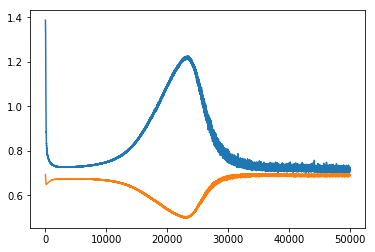

In [4]:
# 训练网络
gan.train(train_X, epoch=100, k=1, mini_batch_size=100)

- PS: 上面的为损失函数曲线，蓝色为判别网络的损失曲线，黄色为生成网络的损失曲线。

(-0.5, 27.5, 27.5, -0.5)

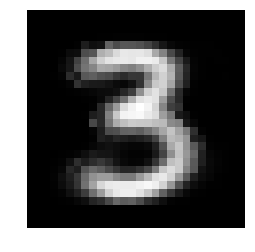

In [8]:
# 生成测试图像
test_x = np.random.uniform(-1,1,size=(100,1))
img = gan.generate(test_x)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img.reshape((28,28)), cmap='gray')
ax.axis('off')

- 上图为 随机向量作为输入，经过生成器输出的图片结果。已经可以很明显的看出为：3，GAN的作用已经显现出来了。